#### <center>KDD CUP 1999</center>

#### ATTACK CLASS
* DOS
    * Denial of service, which depletes the victim's resourcess
    * Back, Land, Neptune, Pod, Smurf, Teardrop, Apache2, Udpstorm, Processtable, Worm
    * Relevant features, "source bytes", "percentage of packets with errors"
    
* Probe
    * Surveillance and other probing attack to gain informaiton about the remote victim
    * Satan, Ipsweep, Nmap, Portsweep, Mscan, Saint
    * Relevant features, "duration of connection", "source bytes"

* R2L
    * Unauthorized access from a remote machine
    * Guess_Password, Ftp_write, Imap, Phf, Multihop, Warezmaster, Warezclient, Spy, Xlock , Xsnoop, Snmpguess, Snmpgetattack, Httptunnel, Sendmail, Named
    * Relevant features, "number of file creations", "number of shell prompts invoked"
    
* U2R
    * Unauthorized access to local super user privileges
    * Buffer_overflow, Loadmodule, Rootkit, Perl, Sqlattack, Xterm, Ps
    * Relevant features, "duration of connection", "service rquested", "number of failed login attempts"

#### Load Training and Test Datta

In [10]:
import pandas as pd

training_data = pd.read_csv('train.txt', names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"])

test_data = pd.read_csv('test.txt', names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"])

In [11]:
def get_label(label):
    if label == 'normal':
        return 0;
    else:
        return 1;

In [12]:
train_y = training_data['attack'].apply(get_label)
test_y = test_data['attack'].apply(get_label)

In [13]:
training_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


#### Visualization

In [15]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [16]:
training_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>,
        <Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrong_fragment'}>,
        <Axes: title={'center': 'urgent'}>],
       [<Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'num_failed_logins'}>,
        <Axes: title={'center': 'logged_in'}>,
        <Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'root_shell'}>,
        <Axes: title={'center': 'su_attempted'}>],
       [<Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_shells'}>,
        <Axes: title={'center': 'num_access_files'}>,
        <Axes: title={'center': 'num_outbound_cmds'}>,
        <Axes: title={'center': 'is_host_login'}>],
       [<Axes: title={'center': 'is_guest_login'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title

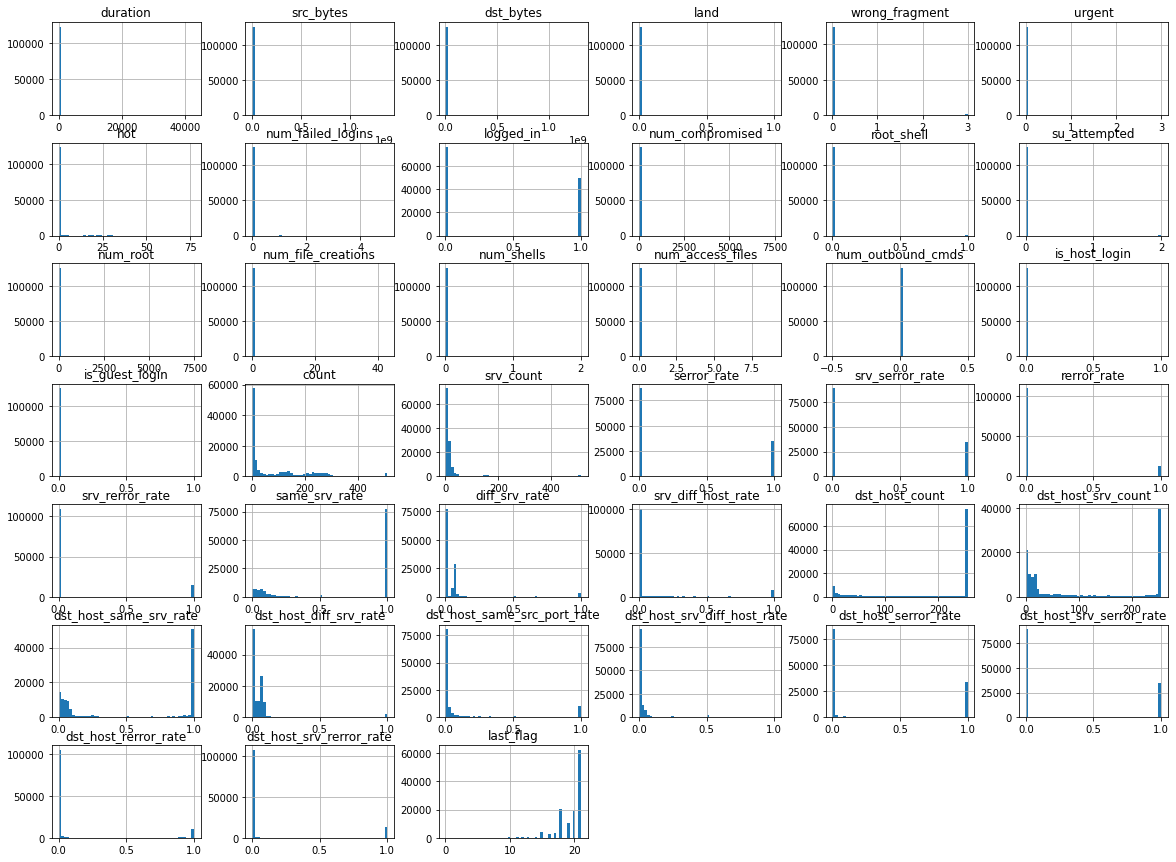

In [17]:
training_data.hist(bins = 50, figsize = (20, 15))

In [18]:
training_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [19]:
training_data['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

#### Features
    * 125973*43
    * No missed fields
    * bag-of-words
        * create a list of terms that occur in a specific field, count the number of times a term appears in each record as the features
        * lose the order of the words
    * n-gram
        * create a list of contiguous sequences of n items, count the nuber of times each sequence in each record as the features
        * bag-of-words is 1-gram

#### Basic Features

1. **duration**
* *numeric*
* Length of time duration of the connection
* Quantile transformation

2. **protocol_type**
* *categorical*
* Protocol used in the connection 
* 3 categories, e.g. tcp, udp, icmp
* Process with bag-of-words. Since one word in each document, it equals to one-hot encoding

3. **service**
* *categorical*
* Destination network service used
* 70 categories, e.g. http, private, smtp
* Process with bag-of-words. The categories with top 10 occurence are kept, the rest of categories is grouped as "other_category"

4. **flag**
* *categorical*
* Status of the connection 
* 11 categories, e.g. SF, S-, REJ
* Process with bag-of-words. The categories with top 5 occurence are kept, the rest of categories is grouped as "other_category"

5. **src_bytes**
* *numeric*
* Number of data bytes transferred from source to destination in single connection
* Quantile transformation

6. **dst_bytes**
* *numeric*
* Number of data bytes transferred from destination to source in single connection
* Quantile transformation

7. **land**
* *numeric*
* If source and destination IP addresses and port numbers are equal then, this variable takes value 1, otherwise, 0
* No change

8. **wrong_fragment**
* *numeric*
* Total number of wrong fragments in this connection
* No change

9. **urgent**
* *numeric*
* Number of urgent packets in this connection. Urgent packets are packets with the urgent bit Activated
* No change

#### Content Related Features 

10. **hot**
* *numeric*
* Number of "hot" indicators in the content such as: entering a system directory, creating programsand executing programs
* Quantile transformation

11. **num_failed _logins**
* *numeric*
* Count of failed login attempts
* Quantile transformation

12. **logged_in**
* *numeric*
* 1 if successfully logged in; 0 otherwise
* No change

13. **num_compromised**
* *numeric*
* Number of "compromised" conditions
* Quantile transformation

14. **root_shell**
* *numeric*
* 1 if root shell is obtained; 0 otherwise
* No change

15. **su_attempted**
* *numeric*
* 1 if "su root" command attempted or used; 0 otherwise
* No change

16. **num_root**
* *numeric*
* Number of "root" accesses or number of operations performed as a root in the connection
* Quantile transformation

17. **num_file_creations**
* *numeric*
* Number of file creation operations in the connection
* Quantile transformation

18. **num_shells**
* *numeric*
* Number of shell prompts
* No change

19. **num_access_files**
* *numeric*
* Number of operations on access control files
* Quantile transformation

20. **num_outbound_cmds**
* *numeric*
* Number of outbound commands in an ftp session
* No change

21. **is_host_login**
* *numeric*
* 1 if the login belongs to the "host" list i.e., root or admin; else 0
* No change

22. **is_guest_login**
* *numeric*
* 1 if the login is a "guest" login; 0 otherwise
* No change

#### Time Related Traffic Features

23. **count**
* Number of connections to the same destination host as the current connection in the past two seconds
* Quantile transformation

24. **srv_count**
* Number of connections to the same service (port number) as the current connection in the past two seconds
* Quantile transformation

25. **serror_rate**
* The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23)
* No change

26. **srv_serror_rate**
* The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24)
* No change

27. **rerror_rate**
* The percentage of connections that have activated the flag (4) REJ, among the connections
* No changen

28. **srv_rerror_rate**
* The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count (24)
* No change

29. **same_srv_rate**
* The percentage of connections that were to the same service, among the connections aggregated in count (23)
* No change

30. **diff_srv_rate**
* The percentage of connections that were to different services, among the connections aggregated in count (23)
* No change

31. **srv_diff_host_rate**
* The percentage of connections that were to different destination machines among
* No change

#### Host Based Traffic Features in a Network Connection Vector

32. **dst_host_count**
* Number of connections having the same destination host IP address
* Quantile transformation

33. **dst_host_srv_count**
* Number of connections having the same port number
* Quantile transformation

34. **dst_host_same_srv_rate**
* The percentage of connections that were to the same service, among the connections aggregated in dst_host_count (32)
* No change

35. **dst_host_diff_ srv_rate**
* The percentage of connections that were to different services, among the connections aggregated in dst_host_count (32)
* No change

36. **dst_host_same _src_port_rate**
* The percentage of connections that were to the same source port, among the connections aggregated in dst_host_srv_c ount (33)
* No change

37. **dst_host_srv_diff_host_rate**
* The percentage of connections that were to different destination machines, among the connections aggregated in dst_host_srv_count (33)
* No change

38. **dst_host_serror_rate**
* The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count (32)
* No change

39. **dst_host_srv_serror_rate**
* The percent of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_c ount (33)
* No change

40. **dst_host_rerror_rate**: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count (32)
* No change

41. **dst_host_srv_rerror_rate**: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_srv_c ount (33)
* No change

In [20]:
training_data.iloc[:, 35:].head()

,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [21]:
training_data['srv_serror_rate'].value_counts()

0.00    88754
1.00    34874
0.50      432
0.33      273
0.25      233
        ...  
0.57        1
0.74        1
0.65        1
0.46        1
0.28        1
Name: srv_serror_rate, Length: 86, dtype: int64

#### Preprocessing

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class Get_top_categories(BaseEstimator, TransformerMixin):
    """Create a class to keep the top categories, the rest categories are labeled as 'other'
    """
    
    def __init__(self, top_num = 10): # no *args or **kargs
        """Create a class
        
        Arg:
            top_num (int), the number of top categories kept, default number is 10
        """
        self.top_num = top_num
    
    def fit(self, X, y = None):
        """Fit the class
        
        Arg:
            X (Pandas.Series), a column of a Pandas.DataFrame
            y (None), not used
        """
        temp = X.value_counts()
        self.columns = list(temp[:self.top_num].index)
        return self
    
    def containe(self, s):
        """Process record
        
        Arg:
            s (str), a recod in the categorical column
            
        Return:
            str, return the same string is a recod in the top category list; otherwise, return 'other'
        """
        if s in self.columns:
            return s
        else:
            return 'other_category'
        
    def transform(self, X):
        """Convert a specific categorical column
        
        Arg:
            X (Pandas.Series), a column of a Pandas.DataFrame
            
        Return:
            Pandas.Series, processed column
        """
        temp = X.apply(self.containe)
        return temp

In [24]:
class DoNothing(BaseEstimator, TransformerMixin):
    """Do not change anything"""
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        temp = X.copy()
        return temp

In [25]:
# process numerical features
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

num_pipeline_gaussian = Pipeline([
    ('quantile', QuantileTransformer(output_distribution='normal', random_state=0)),
    #('std_scaler', StandardScaler()),  
])

In [26]:
# process categorical features with bag of words
cat_pipeline = Pipeline([
    ('bag_of_words', CountVectorizer()),
])

cat_pipeline_five = Pipeline([
    ('more_than_five', Get_top_categories(top_num=5)),
    ('bag_of_words', CountVectorizer()),    
])

cat_pipeline_ten = Pipeline([
    ('more_than_ten', Get_top_categories()),
    ('bag_of_words', CountVectorizer()),    
])

In [27]:
# do not change features
do_nothing_pipeline = Pipeline([
    ('do_nothing', DoNothing())
])

In [28]:
from sklearn.compose import ColumnTransformer

preprocess_pipeline = ColumnTransformer([
        ("num_pipeline_guassion", num_pipeline_gaussian, ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'num_access_files', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']), # 3, pass a DataFrame to num_pipeline
        ("cat_pipeline_protocol_type", cat_pipeline, 'protocol_type'), # 3, pass a Series to cat_pipeline
        ("cat_pipeline_service", cat_pipeline_ten, 'service'), # 11, pass a Series to cat_pipeline_ten  
        ("cat_pipeline_flag", cat_pipeline_five, 'flag'), # 6, pass a Series to cat_pipeline_ten
        ("do_nothing", do_nothing_pipeline, ['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_shells', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']) # 1, pass a DataFrame to num_pipeline
    ])

In [29]:
# num_pipeline_gaussian, 12
# cat_pipeline_protocol_type, 3
# cat_pipeline_service, 11
# cat_pipeline_flag, 6
# do_nothing, 26
train_x = preprocess_pipeline.fit_transform(training_data)
column1 = ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'num_access_files', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']
column2 = ['p0', 'p1', 'p2']
column3 = ['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10']
column4 = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5']
column5 = ['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_shells', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
columns = column1+column2+column3+column4+column5
train_x = pd.DataFrame(train_x, columns=columns)

In [40]:
import plotly.express as px
fig = px.histogram(train_x, x="srv_count", nbins=100)
fig.update_layout(
    xaxis_title="srv_count",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="blue"
    )
)
fig.write_image("temp3.png")

In [39]:
train_x.shape

(125973, 58)

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>,
        <Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_access_files'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'srv_count'}>,
        <Axes: title={'center': 'dst_host_count'}>,
        <Axes: title={'center': 'dst_host_srv_count'}>,
        <Axes: title={'center': 'p0'}>, <Axes: title={'center': 'p1'}>,
        <Axes: title={'center': 'p2'}>, <Axes: title={'center': 's0'}>],
       [<Axes: title={'center': 's1'}>, <Axes: title={'center': 's2'}>,
        <Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>, <Axes: title={'center': 's6'}>,
        <Axes: title={'center': 's7'}>, <Axes: tit

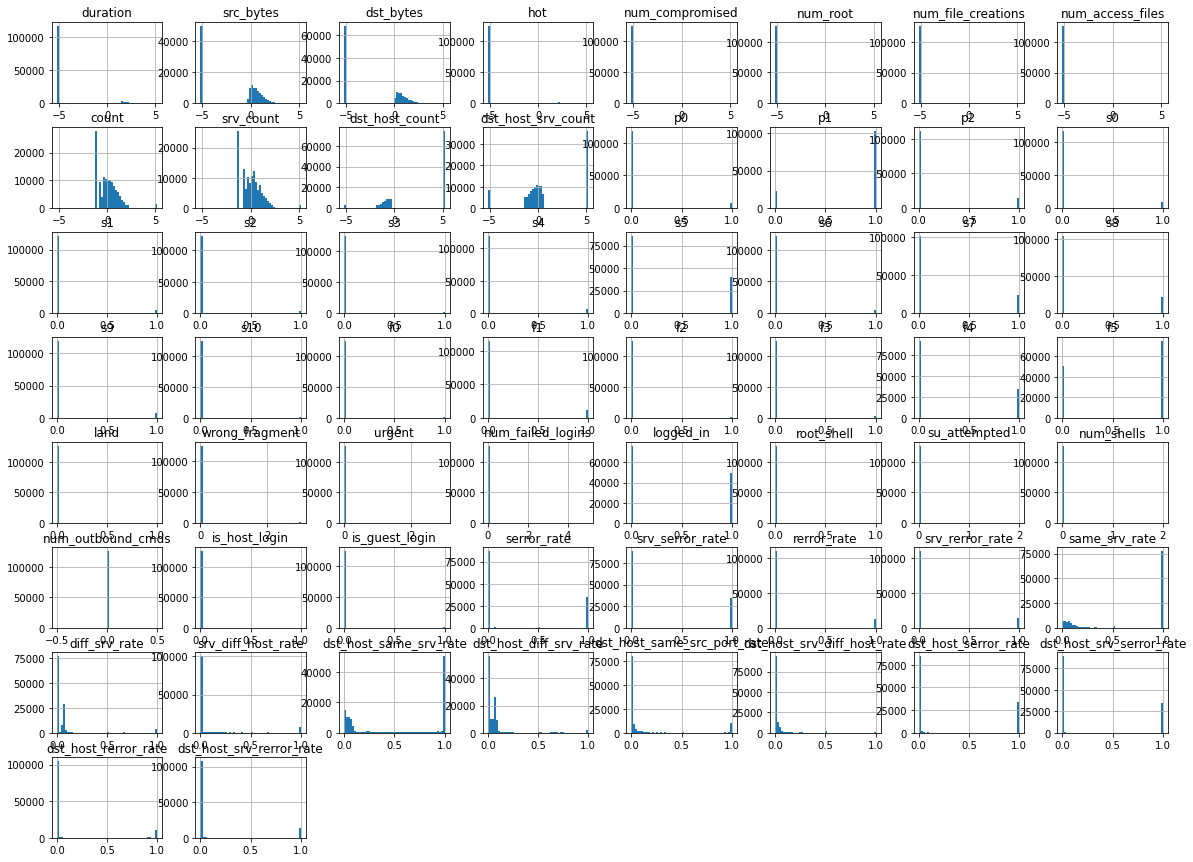

In [30]:
train_x.hist(bins = 50, figsize = (20, 15))

#### Feature Selection

#### Model Selection

In [30]:
models = [] # save models
model_names = ['RFT', 'LR', 'LinearSVM', 'SVM', 'KNN', 'ANN']

from sklearn.ensemble import RandomForestClassifier
models.append(RandomForestClassifier())

from sklearn.linear_model import LogisticRegression
models.append(LogisticRegression(solver='lbfgs', multi_class='multinomial'))

from sklearn.svm import LinearSVC
models.append(LinearSVC(loss="hinge"))

from sklearn.svm import SVC
models.append(SVC())

from sklearn.neighbors import KNeighborsClassifier
models.append(KNeighborsClassifier())

from sklearn.neural_network import MLPClassifier
models.append(MLPClassifier())

In [ ]:
from sklearn.model_selection import cross_val_score
def cross_validation(model, X, Y, k = 10, metric = 'accuracy'):
    scores = cross_val_score(model, X, Y, scoring=metric, cv = k);
    return scores.mean(), scores.std()

for index, model in enumerate(models):
    mean, std = cross_validation(model, train_x, train_y, k=5, metric='accuracy')
    print(model_names[index], mean, std)

#### Fine Tuning

#### Ensembling

In [34]:
from sklearn.ensemble import StackingClassifier

In [35]:
from sklearn.ensemble import StackingClassifier
estimators=[('rft', RandomForestClassifier()), ('svm', SVC()), ('knn', KNeighborsClassifier()), ('ann', MLPClassifier())]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

mean, std = cross_validation(stacking_clf, train_x, train_y, 5)

In [36]:
mean, std

(0.9989918477110576, 4.047088283257817e-05)

In [37]:
stacking_clf.fit(train_x, train_y)

StackingClassifier(estimators=[('rft', RandomForestClassifier()),
                               ('svm', SVC()), ('knn', KNeighborsClassifier()),
                               ('ann', MLPClassifier())],
                   final_estimator=LogisticRegression())

#### Pipelining

In [38]:
from sklearn.pipeline import make_pipeline
#models[4].fit(train_x, train_y)
pipeline_model = make_pipeline(preprocess_pipeline, stacking_clf)

#### Testing

In [93]:
train_pred = pipeline_model.predict(training_data)

In [94]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(train_y, train_pred)
pd.DataFrame(cf_matrix, index = ['Normal_true', 'Malicious_true'], columns = ['Normal_pred', 'Malicious_pred'])

,Normal_pred,Malicious_pred
Normal_true,67335,8
Malicious_true,0,58630


In [95]:
from sklearn.metrics import classification_report
print(classification_report(train_y, train_pred, target_names=['normal', 'malicious']))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     67343
   malicious       1.00      1.00      1.00     58630

    accuracy                           1.00    125973
   macro avg       1.00      1.00      1.00    125973
weighted avg       1.00      1.00      1.00    125973



In [96]:
test_results = pipeline_model.predict(test_data)

In [97]:
cf_matrix = confusion_matrix(test_y, test_results) # True, Prediction

In [98]:
# each row corresponding to the true class
# each column corresponding to the prediction class
pd.DataFrame(cf_matrix, index = ['Normal_true', 'Malicious_true'], columns = ['Normal_pred', 'Malicious_pred'])

,Normal_pred,Malicious_pred
Normal_true,9446,265
Malicious_true,4507,8326


In [99]:
print(classification_report(test_y, test_results, target_names=['normal', 'malicious']))

              precision    recall  f1-score   support

      normal       0.68      0.97      0.80      9711
   malicious       0.97      0.65      0.78     12833

    accuracy                           0.79     22544
   macro avg       0.82      0.81      0.79     22544
weighted avg       0.84      0.79      0.79     22544



#### Reference
* <a href = "https://www.kaggle.com/anushonkar/network-anamoly-detection">Network Anomaly Detection</a>